## Importação das bibliotecas


In [ ]:
# para carregar e visualizar a base de dados
import pandas as pd
# separação da base de dados entre treinamento e teste
from sklearn.model_selection import train_test_split
# definição de vetores
import numpy as np
# visualização
import seaborn as sns
# gerando matriz de confusao e o score
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import torch 
torch.__version__

'2.0.0+cu118'

In [ ]:
import torch.nn as nn

## Base de dados

definindo uma semente (seed) aleatória igual a 123 para o gerador de números aleatórios do numpy e do PyTorch (np.random.seed(123) e torch.manual_seed(123)). Essa semente é usada para inicializar o estado do gerador de números aleatórios e, assim, garantir que os números gerados sejam reproduzíveis. Ou seja, caso você execute novamente o mesmo código com a mesma semente, os números aleatórios gerados serão os mesmos. Essa é uma prática comum em tarefas de aprendizado de máquina e ciência de dados, pois ajuda a garantir que os resultados sejam reprodutíveis e comparáveis.

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv("/content/entradas_breast.csv")
classe = pd.read_csv("/content/saidas_breast.csv")

In [ ]:
previsores.shape

(569, 30)

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe.shape

(569, 1)

In [ ]:
np.unique(classe)

array([0, 1])

In [ ]:
counts = classe['0'].value_counts()

# criar o gráfico de barras usando seaborn
sns.barplot(x=counts.index, y=counts.values)

In [ ]:
# Divisao em treinamento e teste
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, 
                                                                                              classe, 
                                                                                              test_size = 0.25)

In [ ]:
previsores_treinamento.shape

(426, 30)

In [ ]:
previsores_teste.shape

(143, 30)

In [ ]:
classe_treinamento.shape

(426, 1)

In [ ]:
classe_teste.shape

(143, 1)

## Transformação dos dados para tensores -> Convertendo os dados para tensores

In [ ]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [ ]:
type(classe_treinamento)

pandas.core.frame.DataFrame

In [ ]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [ ]:
type(classe_teste)

pandas.core.frame.DataFrame

In [ ]:
# Convertendo para um array do numpy
type(np.array(previsores_treinamento))

numpy.ndarray

In [ ]:
type(np.array(classe_treinamento))

numpy.ndarray

In [ ]:
# Transformação para tensor
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype=torch.float)

In [ ]:
type(previsores_treinamento)

torch.Tensor

In [ ]:
type(classe_treinamento)

torch.Tensor

In [ ]:
# unindo as variaveis em apenas uma variavel (concatenando)
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

A função DataLoader permite criar um iterador que percorre o conjunto de dados de forma eficiente, carregando e pré-processando os dados sob demanda

Função DataLoader do PyTorch simplifica o processo de carregamento e pré-processamento de conjuntos de dados durante o treinamento de modelos de aprendizado de máquina. Ela permite carregar os dados em lotes, aplicar transformações e realizar embaralhamento e paralelismo, tornando o treinamento mais eficiente e fácil de implementar.

In [ ]:
#é usado para carregar dados para treinamento de um modelo de rede neural em lotes
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

NameError: ignored

## Construção do modelo

In [ ]:
# 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [ ]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterion = nn.BCELoss() # calculo do erro

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001) 

## Treinando o modelo

In [ ]:
# fit -> Treinando o modelo usando um loop
for epoch in range(100):
  running_loss = 0.

  for data in train_loader: 
    inputs, labels = data
    optimizer.zero_grad()

    outputs = classificador(inputs) # classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f"Epoch {epoch+1:3d} and Loss {running_loss/len(train_loader):.5f}")

Epoch   1 and Loss 0.12813
Epoch   2 and Loss 0.20026
Epoch   3 and Loss 0.14356
Epoch   4 and Loss 0.13155
Epoch   5 and Loss 0.13594
Epoch   6 and Loss 0.13157
Epoch   7 and Loss 0.23698
Epoch   8 and Loss 0.19041
Epoch   9 and Loss 0.16045
Epoch  10 and Loss 0.15031
Epoch  11 and Loss 0.16285
Epoch  12 and Loss 0.14192
Epoch  13 and Loss 0.12046
Epoch  14 and Loss 0.12648
Epoch  15 and Loss 0.13567
Epoch  16 and Loss 0.11467
Epoch  17 and Loss 0.15016
Epoch  18 and Loss 0.17963
Epoch  19 and Loss 0.13323
Epoch  20 and Loss 0.12514
Epoch  21 and Loss 0.12966
Epoch  22 and Loss 0.12253
Epoch  23 and Loss 0.10750
Epoch  24 and Loss 0.13508
Epoch  25 and Loss 0.13340
Epoch  26 and Loss 0.18406
Epoch  27 and Loss 0.19429
Epoch  28 and Loss 0.20406
Epoch  29 and Loss 0.12165
Epoch  30 and Loss 0.12479
Epoch  31 and Loss 0.10650
Epoch  32 and Loss 0.11287
Epoch  33 and Loss 0.20692
Epoch  34 and Loss 0.15447
Epoch  35 and Loss 0.14858
Epoch  36 and Loss 0.12057
Epoch  37 and Loss 0.11159
E

## Visualização dos pesos

In [ ]:
params = list(classificador.parameters())

In [ ]:
params

[Parameter containing:
 tensor([[-4.5555e-01,  7.5600e-02, -4.9457e-01, -1.7996e-01,  1.3867e-01,
           3.8671e-02, -4.2786e-02, -4.8028e-02, -2.0412e-01,  5.1387e-01,
           1.3424e-01,  5.8274e-02,  9.4644e-02,  3.8019e-03,  2.3516e-02,
          -7.4314e-02, -3.4113e-01,  4.2877e-02,  6.3772e-01,  3.1672e-01,
          -1.4218e-01,  1.7250e-01, -3.4669e-01,  1.5152e-01,  2.1708e-01,
          -1.4717e-01, -4.1831e-01, -2.8003e-01,  1.5381e-01,  4.3773e-01],
         [-1.6695e-02,  1.6671e-03,  1.6777e-02, -1.1527e-02,  4.3521e-39,
           7.6436e-40,  5.4690e-39,  2.5977e-39, -2.5098e-08,  2.7733e-39,
          -1.8516e-39, -7.0587e-02, -1.0568e-01, -6.5979e-03, -4.7450e-39,
          -3.2570e-39, -4.2753e-39,  5.7601e-39,  3.4279e-39, -7.3841e-40,
           1.0946e-01,  1.2111e-03,  9.9767e-03, -8.5987e-02,  4.3959e-39,
          -4.4838e-40, -1.1421e-39, -3.2162e-39, -1.2314e-39, -1.0398e-39],
         [ 3.6971e-02,  7.8618e-02,  6.9545e-02,  6.6401e-02,  4.1755e-02,


In [ ]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [ ]:
print(pesos0)

Parameter containing:
tensor([[-4.5555e-01,  7.5600e-02, -4.9457e-01, -1.7996e-01,  1.3867e-01,
          3.8671e-02, -4.2786e-02, -4.8028e-02, -2.0412e-01,  5.1387e-01,
          1.3424e-01,  5.8274e-02,  9.4644e-02,  3.8019e-03,  2.3516e-02,
         -7.4314e-02, -3.4113e-01,  4.2877e-02,  6.3772e-01,  3.1672e-01,
         -1.4218e-01,  1.7250e-01, -3.4669e-01,  1.5152e-01,  2.1708e-01,
         -1.4717e-01, -4.1831e-01, -2.8003e-01,  1.5381e-01,  4.3773e-01],
        [-1.6695e-02,  1.6671e-03,  1.6777e-02, -1.1527e-02,  4.3521e-39,
          7.6436e-40,  5.4690e-39,  2.5977e-39, -2.5098e-08,  2.7733e-39,
         -1.8516e-39, -7.0587e-02, -1.0568e-01, -6.5979e-03, -4.7450e-39,
         -3.2570e-39, -4.2753e-39,  5.7601e-39,  3.4279e-39, -7.3841e-40,
          1.0946e-01,  1.2111e-03,  9.9767e-03, -8.5987e-02,  4.3959e-39,
         -4.4838e-40, -1.1421e-39, -3.2162e-39, -1.2314e-39, -1.0398e-39],
        [ 3.6971e-02,  7.8618e-02,  6.9545e-02,  6.6401e-02,  4.1755e-02,
          1.78

In [ ]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [ ]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [ ]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Avaliação do modelo

In [ ]:
classificador.eval() # evaluate classificador em modo de avaliação, as operações matematicas nao sao monitoradas para o modo de gradiente

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [ ]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [ ]:
type(previsores_teste)

torch.Tensor

In [ ]:
previsoes = classificador.forward(previsores_teste)

In [ ]:
previsoes

tensor([[9.8962e-01],
        [1.0000e+00],
        [1.0856e-02],
        [9.8117e-01],
        [5.1518e-04],
        [1.7902e-01],
        [9.1728e-01],
        [5.2265e-01],
        [6.0488e-01],
        [8.7379e-01],
        [9.9357e-01],
        [1.0000e+00],
        [9.4744e-01],
        [9.9577e-01],
        [9.9999e-01],
        [6.5111e-01],
        [9.9686e-01],
        [1.0000e+00],
        [4.8732e-01],
        [1.0000e+00],
        [3.6036e-20],
        [9.3174e-03],
        [4.3112e-01],
        [1.0000e+00],
        [8.9556e-01],
        [5.9136e-03],
        [1.1112e-01],
        [9.8842e-01],
        [9.4268e-05],
        [9.9902e-01],
        [4.8678e-01],
        [9.9985e-01],
        [8.1287e-01],
        [9.6913e-01],
        [2.1382e-02],
        [9.9680e-01],
        [1.8696e-01],
        [1.0000e+00],
        [9.8596e-01],
        [5.4415e-03],
        [4.2782e-03],
        [8.8986e-01],
        [4.4672e-09],
        [1.8510e-01],
        [1.7662e-05],
        [6

In [ ]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [ ]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.9020979020979021

In [ ]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[47,  7],
       [ 7, 82]])

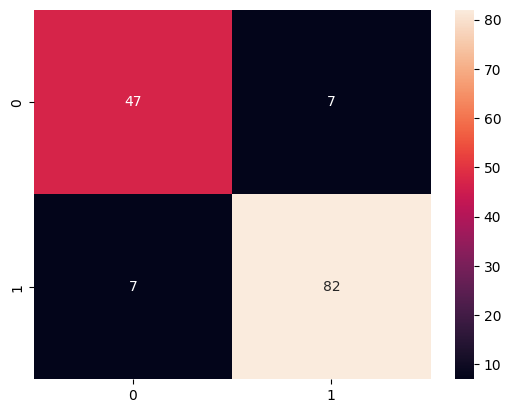

In [ ]:
sns.heatmap(matriz, annot=True);